<a href="https://colab.research.google.com/github/GGpark1/Deep_Learning_Study/blob/master/%5Bsc%5D%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EA%B8%B0%EB%B3%B8%EA%B8%B0%20%EB%8B%A4%EC%A7%80%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:** 퍼셉트론을 구성하는 단위로서 다수의 입력신호를 받은 뒤 다음 층에 보낼지 말지를 결정하는 장소입니다. 이전 뉴런(노드)에서 보낸 신호의 총합이 정해진 한계를 넘어설 때만 다음 뉴런(노드)로 신호를 출력합니다.
- **Input Layer:** 데이터를 입력 받는 층입니다. Input Layer의 노드 수는 입력되는 데이터셋의 특성 수와 같습니다.
- **Hidden Layer:** 입력된 신호의 가중치와 편향을 연산하는 층입니다. 연산 과정을 사용자가 볼 수 없기 때문에 은닉층이라고 부릅니다. 은닉층에 입력된 신호는 지정된 활성화 함수에 의해 연산됩니다.
- **Output Layer:** 입력층으로부터 입력된 데이터가 은닉층의 연산을 거쳐 최종 출력된 층입니다. 풀려는 문제의 유형에 따라 활성화 함수와 노드 수를 결정해야 합니다.
- **Activation Function:** 가중치가 곱해진 입력 신호의 총합(가중합)을 얼마만큼의 신호로 출력할지 연산하는 함수입니다. 보통 임계값을 기준으로 출력값이 변화합니다. 예를 들어 계단함수는 0을 넘기면 1을 그렇지 않으면 0을 출력합니다. ReLU 함수는 0을 넘기면 입력된 값 그대로 출력하고, 그렇지 않으면 0을 출력합니다. 
- **Back Propagation:** 입력층-은닉층-출력층을 거쳐 값을 내보내는 과정을 순전파라고 합니다. 이러한 순전파의 출력 결과와 타겟값과의 차이를 계산하여 손실(Loss)로 나타낼 수 있습니다. **역전파**는 이 손실을 줄이기 위해 순전파가 왔던 과정을 다시 역(출력층-은닉층-입력층)으로 돌아가는 방법이며, 각 층과 노드에서 손실을 줄일 수 있는 방향으로 가중치와 편향을 조정합니다. 

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

- **순전파** : 정해진 예산에 딱 맞춰 책을 고르려고 합니다.
- **손실 함수** : 책 값을 계산해보니 예산에서 초과하거나 예산보다 적은 금액의 책을 골랐습니다.
- **역전파** : 어떤 책이 최종 책값에 어떤 영향을 미쳤는지 책 값에 대한 책의 영향력(즉, 기울기)을 계산합니다. 특정 책의 책값이 0보다 크면 더 싼 책을 고르고, 0보다 작으면 더 비싼 책을 고릅니다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.


### 1단계. 순전파

#### 1) 입력

- 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력합니다.
- 입력 신호는 각각 고유한 가중치가 곱해져 다음 노드(뉴런)에 보내집니다.

#### 2) 출력 및 오차 계산

- 노드(뉴런)에 도착한 다수의 신호의 총합이 정해진 한계를 넘어설 때만 다음 노드로 신호를 출력합니다. 이 출력 한계를 정하는 것은 활성화 함수입니다.
- 활성화 함수를 통과한 값을 출력값이라고 합니다.
- 활성화 함수를 거쳐 최종값이 출력되면 타겟데이터를 비교하여 Loss(오차)를 계산합니다.

### 2단계. 역전파

- 오차를 줄이기 위해 역전파를 시행합니다.
- 역전파 과정에서 손실을 최소화하는 방향으로 가중치와 편향이 조정됩니다. 즉, 중요하지 않은 특성의 가중치와 편향의 크기를 줄입니다.

### 3단계. 다시 순전파

- 다시 순전파를 진행합니다. 조정된 가중치와 편향에 의해서 가중합이 계산되고 활성화 함수에 의해 다음 노드로의 출력이 결정됩니다.
- 역전파 과정에서 중요하지 않다고 판단된 특성은 **가중치와 편향이 조정되어 이번 Iteration에서 활성화 함수를 통과하지 못할 수 있습니다. 즉, 출력되지 않을 수 있습니다.**
- 위와 같은 과정을 거쳐 출력값과 타겟 데이터의 Loss를 줄이는 방향으로 모델 예측/분류가 시행됩니다.

#### 반복

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

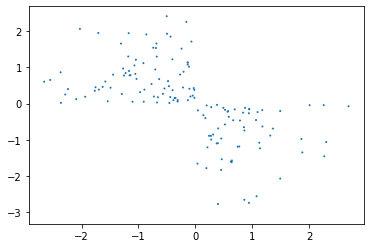

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [ ]:
#모듈 import

import tensorflow as tf

In [ ]:
#시드 고정

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(1, activation='sigmoid')])

model1.compile(optimizer = 'sgd',
               loss = 'binary_crossentropy',
               metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7432 - accuracy: 0.4767
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7408 - accuracy: 0.4767
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.4800
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.4833
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7341 - accuracy: 0.4833
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.4833
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.4833
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.4867
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.4900
Epoch 10/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7242 - accuracy: 0.5000
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2, stratify=y)

In [ ]:
#3층 신경망

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(8, activation = 'relu'))
model2.add(tf.keras.layers.Dense(30, activation = 'relu'))
model2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

h2 = model2.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test), callbacks = [myCallback()])

Epoch 1/30
8/8 [==============================] - 1s 25ms/step - loss: 0.6977 - accuracy: 0.5750 - val_loss: 0.7048 - val_accuracy: 0.5500
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6292 - val_loss: 0.6822 - val_accuracy: 0.5833
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.6552 - accuracy: 0.6583 - val_loss: 0.6613 - val_accuracy: 0.5833
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.6353 - accuracy: 0.6750 - val_loss: 0.6424 - val_accuracy: 0.6667
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.7083 - val_loss: 0.6239 - val_accuracy: 0.6833
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.7500 - val_loss: 0.6071 - val_accuracy: 0.7833
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.5855 - accuracy: 0.8042 - val_loss: 0.5913 - val_accuracy: 0.8167
Epoch 8/30
8/8 [=================

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [ ]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


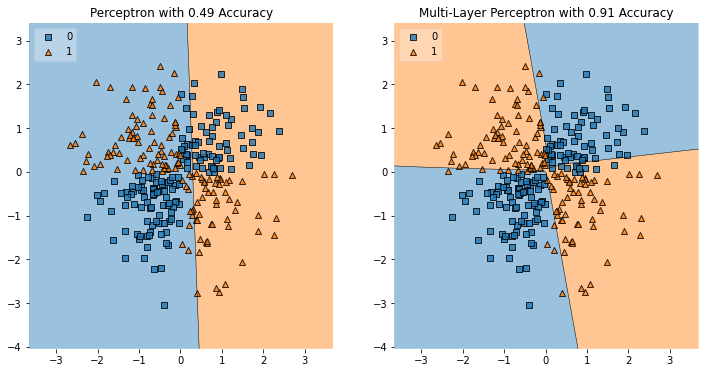

In [ ]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

### 단층 퍼셉트론의 한계(model1)

- 단층 퍼셉트론은 활성화 함수에 의해 정해진 기준에 따라 0 또는 1을 출력합니다.

- 즉 단층 퍼셉트론은 위의 첫 번째 그래프와 같이 직선에 따라 입력된 데이터의 특성 영역을 둘로 나눕니다.

- 문제는 하나의 직선으로 입력 데이터의 특성을 나누지 못할 떄입니다.

- 배타적 논리합 구조(XOR gate)에서는 하나의 직선으로 데이터의 특성을 구분하지 못합니다.

- 이와 같은 단층 퍼셉트론의 한계를 보여주는 그래프가 두 번째 그래프입니다.

### 단층 퍼셉트론의 한계를 극복하기 위한 다층 퍼셉트론(model2)

- 단층 퍼셉트론의 위와 같은 한계를 극복하기 위해 퍼셉트론을 다층으로 쌓아올릴 수 있습니다.

- 하나의 선으로 데이터를 구분하지 못한다면 두 번째 그래프처럼 여러개의 선을 그어 데이터를 구분하면 되기 때문입니다.

- 이를 다층 퍼셉트론이라고 부릅니다.

- model1보다 model2의 성능이 더 좋은 이유는 퍼셉트론을 다층으로 쌓아 입력된 데이터의 특징을 하나 이상의 선으로 구분했기 때문입니다. 즉, 다층 퍼셉트론을 사용하면 입력 데이터의 특징을 더욱 잘 추출할 수 있습니다.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1


In [ ]:
#피쳐와 타겟 분리

target = 'target'
features = df.drop(columns = [target]).columns

In [ ]:
#분리 확인

X = df[features]
y = df[target]

print(X.head())
print(y.head())

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
231   57    1   0       165   289  ...      0      1.0      1   3     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
104   50    1   2       129   196  ...      0      0.0      2   0     2
292   58    0   0       170   225  ...      1      2.8      1   2     1
159   56    1   1       130   221  ...      0      0.0      2   0     3

[5 rows x 13 columns]
231    0
301    0
104    1
292    0
159    1
Name: target, dtype: int64


In [ ]:
#학습 데이터, 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2, stratify=y)

In [ ]:
#기본 모델 구축

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(30, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test))

Epoch 1/30
8/8 [==============================] - 1s 49ms/step - loss: 10.9478 - accuracy: 0.5463 - val_loss: 7.6446 - val_accuracy: 0.5395
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 5.3127 - accuracy: 0.5463 - val_loss: 1.8696 - val_accuracy: 0.5395
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 1.1787 - accuracy: 0.5727 - val_loss: 1.6917 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 1.6298 - accuracy: 0.4802 - val_loss: 0.8498 - val_accuracy: 0.5395
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.9754 - accuracy: 0.5727 - val_loss: 1.1420 - val_accuracy: 0.6184
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.8885 - accuracy: 0.5991 - val_loss: 0.7495 - val_accuracy: 0.5921
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.9434 - accuracy: 0.5242 - val_loss: 0.7440 - val_accuracy: 0.5789
Epoch 8/30
8/8 [================

In [ ]:
#기본 모델 평가

result = model.evaluate(x=X_test, y=y_test, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.6184


In [ ]:
#모듈 import

from tensorflow.keras.layers import Dense, Flatten, Dropout
!pip install -U keras-tuner
import kerastuner as kt
import IPython

In [ ]:
#tuner를 활용한 하이퍼파라미터 조정
#3층 신경망 모델
#가중치 초기화 적용
#BatchNormalization 적용
#노드 수 / 드롭아웃 범위 / 학습률 탐색

def model_builder(hp):

    He_normal = tf.keras.initializers.he_normal(seed=None)
    batch_normal = tf.keras.layers.BatchNormalization()
    model = tf.keras.Sequential()

    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(Dense(units= hp_units, activation = 'relu', kernel_initializer = He_normal))
    model.add(batch_normal)
    hp_dropout = hp.Float('dropout', 0, 0.5, step=0.1)
    Dropout(rate=hp_dropout)

    hp_units_2 = hp.Int('units_2', min_value = 32, max_value = 512, step = 32)
    model.add(Dense(units=hp_units_2, activation = 'relu', kernel_initializer = He_normal))
    model.add(batch_normal)
    hp_dropout_2 = hp.Float('dropout_2', 0, 0.5, step=0.1)
    Dropout(rate=hp_dropout_2)
    
    model.add(Dense(10, activation = 'sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
    
    return model

#튜너 제작

tuner = kt.RandomSearch(model_builder,
                     objective = 'val_accuracy',
                     max_trials =  10,
                     directory = 'my_dir_5',
                     project_name = 'intro_to_kt')

#callback 함수 지정

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait=True)

In [ ]:
#하이퍼파라미터 탐색

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 10 Complete [00h 00m 02s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 29s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
#모듈 인스턴스

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
#조정 결과

print(f"""
하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 {best_hps.get('units')} 입니다.
최적화된 두 번째 Dense 노드 수는 {best_hps.get('units_2')}
최적의 학습 속도는 {best_hps.get('learning_rate')} 입니다.
최적화된 첫 번째 드롭 아웃은 {best_hps.get('dropout')}
최적화된 두 번째 드롭 아웃은 {best_hps.get('dropout_2')}
""")


하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 352 입니다.
최적화된 두 번째 Dense 노드 수는 416
최적의 학습 속도는 0.001 입니다.
최적화된 첫 번째 드롭 아웃은 0.0
최적화된 두 번째 드롭 아웃은 0.2



In [ ]:
#조정된 모델로 다시 학습하기

model = tuner.hypermodel.build(best_hps)

model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_data = (X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 56ms/step - loss: 1.4685 - accuracy: 0.5625 - val_loss: 0.6013 - val_accuracy: 0.9500
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.2321 - accuracy: 0.9083 - val_loss: 0.3314 - val_accuracy: 0.9500
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1602 - accuracy: 0.9375 - val_loss: 0.2472 - val_accuracy: 0.9500
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1300 - accuracy: 0.9458 - val_loss: 0.1609 - val_accuracy: 0.9667
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1174 - accuracy: 0.9708 - val_loss: 0.1347 - val_accuracy: 0.9833
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1232 - accuracy: 0.9500 - val_loss: 0.1362 - val_accuracy: 0.9667
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1152 - accuracy: 0.9625 - val_loss: 0.1335 - val_accuracy: 0.9667
Epoch 8/100
5/5 [===============

In [ ]:
#모델 평가

hp_result = model.evaluate(x=X_test, y=y_test, verbose=1)

2/2 [==============================] - 0s 6ms/step - loss: 0.0665 - accuracy: 0.9667


In [ ]:
#기본 모델과 하이퍼파라미터를 조정한 모델 비교

print(f"기본 모델의 정확도: {result[1]}")
print(f"하이퍼파라미터 조정 모델의 정확도: {hp_result[1]}")

기본 모델의 정확도: 0.6184210777282715
하이퍼파라미터 조정 모델의 정확도: 0.9666666388511658
